In [1]:
# Load libraries
from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')
impCategorical = SimpleImputer(missing_values=np.nan, 
                               strategy='most_frequent')


from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

In [2]:
url = "124 variable K-8 education dataset.csv"

In [3]:
original_dataset=read_csv(url)

In [4]:
original_dataset

,Unnamed: 0,CHILDID,KURBAN_R,GENDER,RACE,C1R4RSCL,C1R4RPF,C1R4MSCL,C1R4MPF,C1RGSCAL,...,A4TXPE,A5TXPE,B1HGHSTD,B2HGHSTD,B4KHGHST,B4HGHSTD,B5HGHSTD,S2PUBLIC,S4PUBLIC,S6PUBLIC
0,1,0001001C,1.0,2,1,36.58,1.0,39.54,3.0,33.822,...,2.0,NaN,1.0,1.0,NaN,2.0,NaN,1.0,NaN,NaN
1,2,0001002C,1.0,2,1,50.82,3.0,44.44,3.0,38.147,...,2.0,3.0,1.0,1.0,NaN,2.0,1.0,1.0,1.0,1.0
2,3,0001003C,1.0,2,1,40.68,-9.0,28.57,2.0,28.108,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN
3,4,0001004C,1.0,1,1,34.72,1.0,26.62,1.0,25.865,...,2.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,1.0,NaN
4,5,0001005C,1.0,2,1,38.28,1.0,40.88,3.0,38.993,...,3.0,3.0,1.0,1.0,NaN,3.0,1.0,1.0,2.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21404,21405,3116024C,1.0,1,3,23.47,0.0,14.30,0.0,15.256,...,3.0,NaN,3.0,3.0,NaN,4.0,NaN,1.0,NaN,1.0
21405,21406,5213040C,NaN,2,4,NaN,NaN,NaN,NaN,NaN,...,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,1.0,NaN
21406,21407,5245040C,NaN,1,2,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,NaN,NaN,NaN,2.0,1.0,NaN,1.0,NaN
21407,21408,5245041C,NaN,1,-9,NaN,NaN,NaN,NaN,NaN,...,4.0,4.0,NaN,NaN,NaN,3.0,2.0,NaN,1.0,1.0


### Number of Non-NA Values

In [5]:
# Number of Non-NA values in column C4R4MPF (First Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C4R4MPF'].count()

16683

In [6]:
# Number of Non-NA values in column C5R4MPF (Third Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C5R4MPF'].count()

14415

In [7]:
# Number of Non-NA values in column C6R4MPF (Fifth Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C6R4MPF'].count()

11294

In [8]:
# Number of Non-NA values in column C7R4MPF (Eigth Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C7R4MPF'].count()

9307

### Number of NA Values

In [9]:
# Number of NA values in column C4R4MPF (First Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C4R4MPF'].isna().sum()

4726

In [10]:
# Number of NA values in column C5R4MPF (Third Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C5R4MPF'].isna().sum()

6994

In [11]:
# Number of NA values in column C6R4MPF (Fifth Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C6R4MPF'].isna().sum()

10115

In [12]:
# Number of NA values in column C7R4MPF (Eigth Grade RC4 MATH HIGHEST PROF LVL MASTERED)
original_dataset['C7R4MPF'].isna().sum()

12102

## Creating a new dataset with the columns we're using

In [13]:
dataset = original_dataset[["P4CMPEDU","P5CMPEDU","P6CMPEDU","C4R4MPF","C5R4MPF","W1INCCAT","W5INCCAT","W8INCCAT","WKMOMED","WKDADED","P1HMEMP","P1HDEMP","P7HMEMP","P7HDEMP","C6R4MPF"]]

In [14]:
dataset.shape

(21409, 15)

In [15]:
# Number of Non-NA values in each column
dataset.count()

P4CMPEDU    15626
P5CMPEDU    13489
P6CMPEDU    10996
C4R4MPF     16683
C5R4MPF     14415
W1INCCAT    16015
W5INCCAT    10996
W8INCCAT     8809
WKMOMED     20141
WKDADED     20141
P1HMEMP     18097
P1HDEMP     18097
P7HMEMP      8809
P7HDEMP      8809
C6R4MPF     11294
dtype: int64

In [16]:
# Number of NA values in each column
dataset.isna().sum()

P4CMPEDU     5783
P5CMPEDU     7920
P6CMPEDU    10413
C4R4MPF      4726
C5R4MPF      6994
W1INCCAT     5394
W5INCCAT    10413
W8INCCAT    12600
WKMOMED      1268
WKDADED      1268
P1HMEMP      3312
P1HDEMP      3312
P7HMEMP     12600
P7HDEMP     12600
C6R4MPF     10115
dtype: int64

In [17]:
dataset.groupby('C6R4MPF').size()

C6R4MPF
-9.0     413
 1.0       1
 2.0       4
 3.0     135
 4.0     578
 5.0    1726
 6.0    3660
 7.0    3169
 8.0    1419
 9.0     189
dtype: int64

In [18]:
cleandf=dataset.copy().dropna(subset=["C6R4MPF"])

In [19]:
cleandf.shape

(11294, 15)

In [20]:
cleandf.isna().sum()

P4CMPEDU    1022
P5CMPEDU    1257
P6CMPEDU     815
C4R4MPF      304
C5R4MPF      223
W1INCCAT     860
W5INCCAT     815
W8INCCAT    2916
WKMOMED      450
WKDADED      450
P1HMEMP     1507
P1HDEMP     1507
P7HMEMP     2916
P7HDEMP     2916
C6R4MPF        0
dtype: int64

In [21]:
print(cleandf.groupby('C6R4MPF').size())

C6R4MPF
-9.0     413
 1.0       1
 2.0       4
 3.0     135
 4.0     578
 5.0    1726
 6.0    3660
 7.0    3169
 8.0    1419
 9.0     189
dtype: int64


In [22]:
dataset= cleandf[cleandf["C6R4MPF"]>-9]
print(dataset.groupby('C6R4MPF').size())

C6R4MPF
1.0       1
2.0       4
3.0     135
4.0     578
5.0    1726
6.0    3660
7.0    3169
8.0    1419
9.0     189
dtype: int64


In [23]:
dataset.shape

(10881, 15)

In [24]:
# Group some categories together
conditions = [
    (dataset['C6R4MPF'] >= 1.0) & (dataset['C6R4MPF'] <= 5.0),
    (dataset['C6R4MPF'] >= 6.0) & (dataset['C6R4MPF'] < 7.0),
    (dataset['C6R4MPF'] >= 7.0)& (dataset['C6R4MPF'] <= 9.0)]
choices = ['C - Low', 'B - Middle', 'A - High']
scores = np.select(conditions, choices)
dataset.loc[:, ('Score')] = scores
dataset

C:\Users\ekech\AppData\Roaming\Python\Python39\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,C6R4MPF,Score
1,2.0,2.0,2.0,5.0,6.0,12.0,12.0,13.0,3.0,9.0,2.0,1.0,2.0,1.0,8.0,A - High
6,2.0,2.0,-8.0,3.0,4.0,10.0,10.0,10.0,6.0,5.0,1.0,1.0,1.0,1.0,6.0,B - Middle
9,2.0,3.0,4.0,4.0,6.0,11.0,11.0,11.0,7.0,8.0,1.0,1.0,1.0,1.0,6.0,B - Middle
15,2.0,3.0,3.0,4.0,6.0,2.0,10.0,11.0,3.0,3.0,2.0,1.0,-1.0,1.0,7.0,A - High
16,3.0,2.0,3.0,4.0,6.0,11.0,10.0,10.0,6.0,6.0,2.0,1.0,1.0,1.0,7.0,A - High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21394,-1.0,-1.0,1.0,2.0,4.0,4.0,5.0,6.0,5.0,5.0,4.0,1.0,4.0,1.0,4.0,C - Low
21399,-1.0,NaN,-1.0,NaN,5.0,4.0,2.0,2.0,2.0,-1.0,4.0,-1.0,-9.0,-1.0,6.0,B - Middle
21404,NaN,3.0,2.0,2.0,4.0,NaN,3.0,NaN,2.0,-1.0,1.0,-1.0,NaN,NaN,5.0,C - Low
21407,NaN,NaN,4.0,5.0,5.0,NaN,3.0,2.0,NaN,NaN,NaN,NaN,4.0,-1.0,5.0,C - Low


In [25]:
#remove the C6R4MPF column, now that we have the 'Score' category 
dataset=dataset.drop('C6R4MPF',1)
dataset.head()

C:\Users\ekech\AppData\Local\Temp/ipykernel_8080/1502811550.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  dataset=dataset.drop('C6R4MPF',1)


,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,Score
1,2.0,2.0,2.0,5.0,6.0,12.0,12.0,13.0,3.0,9.0,2.0,1.0,2.0,1.0,A - High
6,2.0,2.0,-8.0,3.0,4.0,10.0,10.0,10.0,6.0,5.0,1.0,1.0,1.0,1.0,B - Middle
9,2.0,3.0,4.0,4.0,6.0,11.0,11.0,11.0,7.0,8.0,1.0,1.0,1.0,1.0,B - Middle
15,2.0,3.0,3.0,4.0,6.0,2.0,10.0,11.0,3.0,3.0,2.0,1.0,-1.0,1.0,A - High
16,3.0,2.0,3.0,4.0,6.0,11.0,10.0,10.0,6.0,6.0,2.0,1.0,1.0,1.0,A - High


In [26]:
print(dataset.groupby('Score').size())

Score
A - High      4777
B - Middle    3660
C - Low       2444
dtype: int64


In [27]:
dataset2=dataset[dataset['Score']=='C - Low'].copy()

In [28]:
print(dataset2.groupby('Score').size())

Score
C - Low    2444
dtype: int64


In [29]:
dataset2=dataset2.append(dataset[dataset['Score']=='A - High'].sample(n=2444))

In [30]:
dataset2

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,Score
20,4.0,4.0,2.0,3.0,4.0,6.0,7.0,7.0,4.0,4.0,1.0,1.0,-1.0,1.0,C - Low
47,NaN,NaN,NaN,3.0,5.0,NaN,NaN,NaN,3.0,5.0,4.0,1.0,NaN,NaN,C - Low
56,NaN,-1.0,-1.0,1.0,4.0,NaN,1.0,NaN,2.0,-1.0,4.0,-1.0,NaN,NaN,C - Low
61,NaN,NaN,NaN,2.0,5.0,NaN,NaN,NaN,3.0,5.0,4.0,1.0,NaN,NaN,C - Low
72,3.0,3.0,2.0,3.0,5.0,6.0,9.0,9.0,3.0,3.0,1.0,1.0,1.0,1.0,C - Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20444,3.0,NaN,3.0,5.0,7.0,7.0,10.0,10.0,3.0,5.0,1.0,1.0,1.0,1.0,A - High
3701,3.0,3.0,2.0,4.0,6.0,6.0,8.0,11.0,4.0,-1.0,4.0,-1.0,1.0,1.0,A - High
6509,3.0,1.0,2.0,5.0,7.0,10.0,2.0,11.0,6.0,5.0,4.0,1.0,2.0,1.0,A - High
16575,-1.0,2.0,2.0,4.0,5.0,7.0,4.0,4.0,NaN,NaN,NaN,NaN,1.0,-1.0,A - High


In [31]:
print(dataset2.groupby('Score').size())

Score
A - High    2444
C - Low     2444
dtype: int64


In [32]:
dataset2=dataset2.append(dataset[dataset['Score']=='B - Middle'].sample(n=2444))

In [33]:
print(dataset2.groupby('Score').size())

Score
A - High      2444
B - Middle    2444
C - Low       2444
dtype: int64


In [34]:
len(dataset2)

7332

In [35]:
# Use 75% of the data for training
0.75*7332

5499.0

In [36]:
# Creating our sample of random lines
traindf=dataset2.sample(n=5499)
#Listing what rows our sample is using
traindf.index

Int64Index([ 5845, 19533,  6297,  8543,  1555,  5480, 17884,  3162, 15105,
            16777,
            ...
            15615,  2424,  2157, 13235,  7352,  2026, 21200, 11573, 20245,
             8993],
           dtype='int64', length=5499)

In [37]:
# Printing training dataset which imputation will be performed on
traindf

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,Score
5845,-1.0,2.0,1.0,5.0,5.0,3.0,5.0,7.0,5.0,-1.0,1.0,-1.0,1.0,-1.0,B - Middle
19533,2.0,3.0,3.0,5.0,6.0,11.0,11.0,12.0,6.0,3.0,1.0,1.0,1.0,1.0,A - High
6297,2.0,2.0,2.0,4.0,8.0,11.0,11.0,12.0,6.0,5.0,1.0,4.0,1.0,2.0,A - High
8543,NaN,3.0,3.0,5.0,7.0,NaN,10.0,11.0,NaN,NaN,NaN,NaN,1.0,1.0,A - High
1555,-1.0,-1.0,-1.0,NaN,4.0,4.0,4.0,NaN,2.0,-1.0,3.0,-1.0,NaN,NaN,C - Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3.0,3.0,3.0,4.0,6.0,12.0,12.0,12.0,5.0,-1.0,1.0,-1.0,2.0,1.0,A - High
21200,2.0,2.0,3.0,3.0,6.0,11.0,12.0,12.0,8.0,8.0,2.0,1.0,2.0,1.0,A - High
11573,2.0,2.0,3.0,6.0,7.0,10.0,10.0,11.0,3.0,7.0,4.0,1.0,2.0,1.0,A - High
20245,-1.0,NaN,2.0,4.0,4.0,9.0,5.0,NaN,5.0,3.0,2.0,-1.0,NaN,NaN,B - Middle


In [38]:
# Defining our validation data as rows in dataset2 that are not in our training data
validationdf=dataset2.drop(traindf.index)
len(validationdf)

1833

In [39]:
# taking out all NA's from validation dataset
validationdf=validationdf.dropna()
len(validationdf)

995

In [40]:
# Do imputation on ALL columns of TRAIN 
X = traindf[["P4CMPEDU","P5CMPEDU","P6CMPEDU","C4R4MPF","C5R4MPF","W1INCCAT","W5INCCAT","W8INCCAT","WKMOMED","WKDADED","P1HMEMP","P1HDEMP","P7HMEMP","P7HDEMP"]]

In [41]:
X

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP
5845,-1.0,2.0,1.0,5.0,5.0,3.0,5.0,7.0,5.0,-1.0,1.0,-1.0,1.0,-1.0
19533,2.0,3.0,3.0,5.0,6.0,11.0,11.0,12.0,6.0,3.0,1.0,1.0,1.0,1.0
6297,2.0,2.0,2.0,4.0,8.0,11.0,11.0,12.0,6.0,5.0,1.0,4.0,1.0,2.0
8543,NaN,3.0,3.0,5.0,7.0,NaN,10.0,11.0,NaN,NaN,NaN,NaN,1.0,1.0
1555,-1.0,-1.0,-1.0,NaN,4.0,4.0,4.0,NaN,2.0,-1.0,3.0,-1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,3.0,3.0,3.0,4.0,6.0,12.0,12.0,12.0,5.0,-1.0,1.0,-1.0,2.0,1.0
21200,2.0,2.0,3.0,3.0,6.0,11.0,12.0,12.0,8.0,8.0,2.0,1.0,2.0,1.0
11573,2.0,2.0,3.0,6.0,7.0,10.0,10.0,11.0,3.0,7.0,4.0,1.0,2.0,1.0
20245,-1.0,NaN,2.0,4.0,4.0,9.0,5.0,NaN,5.0,3.0,2.0,-1.0,NaN,NaN


In [42]:
data_imputed=pd.DataFrame(impNumeric.fit(X).transform(X),columns=["P4CMPEDU","P5CMPEDU","P6CMPEDU","C4R4MPF","C5R4MPF","W1INCCAT","W5INCCAT","W8INCCAT","WKMOMED","WKDADED","P1HMEMP","P1HDEMP","P7HMEMP","P7HDEMP"])

In [43]:
data_imputed

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP
0,-1.000000,2.000000,1.0,5.000000,5.0,3.000000,5.0,7.000000,5.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000
1,2.000000,3.000000,3.0,5.000000,6.0,11.000000,11.0,12.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000
2,2.000000,2.000000,2.0,4.000000,8.0,11.000000,11.0,12.000000,6.000000,5.000000,1.000000,4.000000,1.000000,2.000000
3,1.029992,3.000000,3.0,5.000000,7.0,7.670304,10.0,11.000000,4.100362,3.348505,2.056926,0.640523,1.000000,1.000000
4,-1.000000,-1.000000,-1.0,3.383321,4.0,4.000000,4.0,8.645813,2.000000,-1.000000,3.000000,-1.000000,1.510967,0.518943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,3.000000,3.000000,3.0,4.000000,6.0,12.000000,12.0,12.000000,5.000000,-1.000000,1.000000,-1.000000,2.000000,1.000000
5495,2.000000,2.000000,3.0,3.000000,6.0,11.000000,12.0,12.000000,8.000000,8.000000,2.000000,1.000000,2.000000,1.000000
5496,2.000000,2.000000,3.0,6.000000,7.0,10.000000,10.0,11.000000,3.000000,7.000000,4.000000,1.000000,2.000000,1.000000
5497,-1.000000,1.375643,2.0,4.000000,4.0,9.000000,5.0,8.645813,5.000000,3.000000,2.000000,-1.000000,1.510967,0.518943


In [44]:
len(data_imputed)

5499

In [45]:
#Create a new column in data_imputed that doesn't exist yet to tack on the y-variable
data_imputed["Score"]=traindf['Score'].values

In [46]:
data_imputed

,P4CMPEDU,P5CMPEDU,P6CMPEDU,C4R4MPF,C5R4MPF,W1INCCAT,W5INCCAT,W8INCCAT,WKMOMED,WKDADED,P1HMEMP,P1HDEMP,P7HMEMP,P7HDEMP,Score
0,-1.000000,2.000000,1.0,5.000000,5.0,3.000000,5.0,7.000000,5.000000,-1.000000,1.000000,-1.000000,1.000000,-1.000000,B - Middle
1,2.000000,3.000000,3.0,5.000000,6.0,11.000000,11.0,12.000000,6.000000,3.000000,1.000000,1.000000,1.000000,1.000000,A - High
2,2.000000,2.000000,2.0,4.000000,8.0,11.000000,11.0,12.000000,6.000000,5.000000,1.000000,4.000000,1.000000,2.000000,A - High
3,1.029992,3.000000,3.0,5.000000,7.0,7.670304,10.0,11.000000,4.100362,3.348505,2.056926,0.640523,1.000000,1.000000,A - High
4,-1.000000,-1.000000,-1.0,3.383321,4.0,4.000000,4.0,8.645813,2.000000,-1.000000,3.000000,-1.000000,1.510967,0.518943,C - Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5494,3.000000,3.000000,3.0,4.000000,6.0,12.000000,12.0,12.000000,5.000000,-1.000000,1.000000,-1.000000,2.000000,1.000000,A - High
5495,2.000000,2.000000,3.0,3.000000,6.0,11.000000,12.0,12.000000,8.000000,8.000000,2.000000,1.000000,2.000000,1.000000,A - High
5496,2.000000,2.000000,3.0,6.000000,7.0,10.000000,10.0,11.000000,3.000000,7.000000,4.000000,1.000000,2.000000,1.000000,A - High
5497,-1.000000,1.375643,2.0,4.000000,4.0,9.000000,5.0,8.645813,5.000000,3.000000,2.000000,-1.000000,1.510967,0.518943,B - Middle


In [47]:
data_imputed.shape

(5499, 15)

In [48]:
print(data_imputed.groupby('Score').size())

Score
A - High      1837
B - Middle    1809
C - Low       1853
dtype: int64


In [49]:
# Split-out train dataset
array = data_imputed.values
X_train = array[:,0:14]
Y_train= array[:,14]
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [50]:
array[:, 14]

array(['B - Middle', 'A - High', 'A - High', ..., 'A - High',
       'B - Middle', 'B - Middle'], dtype=object)

In [51]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(max_iter=10000, multi_class='multinomial')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski', weights='distance')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='scale')))

In [52]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=7, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.570289 (0.012974)
LDA: 0.534100 (0.009073)
KNN: 0.537374 (0.012878)
CART: 0.522277 (0.006903)
NB: 0.493732 (0.017607)
SVM: 0.622121 (0.016431)


In [53]:
#Set validation set
X_validation=validationdf.iloc[:,0:14]
Y_validation=validationdf.iloc[:,14]

In [54]:
# Make predictions on validation dataset
 
model = SVC(gamma='scale')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

0.6241206030150753
              precision    recall  f1-score   support

    A - High       0.72      0.75      0.73       397
  B - Middle       0.48      0.43      0.45       337
     C - Low       0.64      0.68      0.66       261

    accuracy                           0.62       995
   macro avg       0.61      0.62      0.62       995
weighted avg       0.62      0.62      0.62       995



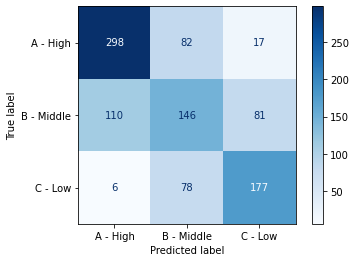

In [55]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
plot_confusion_matrix(model.fit(X_train, Y_train),X_validation,Y_validation,cmap=plt.cm.Blues)
print(classification_report(Y_validation, predictions))